In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop,Adam

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/Users/Prayag Sharma/Desktop/practice repo/IIT-Internship/prototype_faces'

In [15]:
import os
from PIL import Image as im
from numpy import asarray
import cv2
def visualize_sample_images(image1,image2):
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''
    fig, (ax1, ax3) = plt.subplots(1, 2, figsize = (10, 10))
    orig_img1 = cv2.imread(image1, 0)

    forg_img = cv2.imread(image2, 0)

    ax1.imshow(orig_img1)
    #ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img)

    ax1.set_title('1st Image')
    ax1.axis('off')
    ax3.set_title('2nd Image')
    ax3.axis('off')

In [16]:
i = 1 #1 to 40
j = 1 # 1 to 10
path + '/s'  + str(i) + '/' + str(j) + '.jpg'

'/Users/Prayag Sharma/Desktop/practice repo/IIT-Internship/prototype_faces/s1/1.jpg'

In [17]:

for i in os.listdir('/content/drive/MyDrive/prototype_faces'):
  count=1
  for j in os.listdir(os.path.join('/content/drive/MyDrive/prototype_faces',i)):
    os.rename('/content/drive/MyDrive/prototype_faces/{}/{}'.format(i,j),'/content/drive/MyDrive/prototype_faces/{}/{}.jpg'.format(i,count))
    count=count+1

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/prototype_faces'

In [18]:
from PIL import Image

In [19]:
for i in os.listdir('/Users/Prayag Sharma/Desktop/practice repo/IIT-Internship/prototype_faces'):
  count=1
  for j in os.listdir(os.path.join('/Users/Prayag Sharma/Desktop/practice repo/IIT-Internship/prototype_faces',i)):
    im1 = Image.open(r'/Users/Prayag Sharma/Desktop/practice repo/IIT-Internship/prototype_faces/{}/{}'.format(i,j))
    im2 = im1.resize((224,224))
    im2.save('{}.jpg'.format(count))
    count=count+1


In [20]:
os.listdir('/Users/Prayag Sharma/Desktop/practice repo/IIT-Internship/prototype_faces/s12')

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

In [21]:
visualize_sample_images(path + '/s' + str(1) + '/' + str(1) + '.jpg',path + '/s' + str(2) + '/' + str(4) + '.jpg')

NameError: name 'plt' is not defined

In [22]:
image = Image.open(path + '/s' + str(1) + '/' + str(1) + '.jpg')
#reduce the size
data = asarray(image)
print(data.shape)
# saving the final output 
# as a PNG file
#data.save(path + 'new/s' + str(1) + '/' + str(1) + '.jpg')
image = data[::2, ::2]
#get the new size
dim1 = image.shape[0]
dim2 = image.shape[1]
print(dim1,dim2)

(322, 241, 3)
161 121


## Making Pairs

In [81]:
size = 2
total_sample_size = 100
import numpy as np

def get_data(size, total_sample_size):
    #read the image
    image = Image.open(path + '/s' + str(1) + '/' + str(1) + '.jpg')
    #reduce the size
    data = asarray(image)
      
    # saving the final output 
    # as a PNG file
    #data.save(path + 'new/s' + str(1) + '/' + str(1) + '.jpg')
    image = data[::size, ::size]
    #get the new size
    dim1 = image.shape[0]
    dim2 = image.shape[1]
    print(dim1,dim2)
    count = 0
    
    x_geuine_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2]) # 2 is for pairs
    y_genuine = np.zeros([total_sample_size, 1])
    print(x_geuine_pair.shape)
    print(y_genuine.shape)
    for i in range(40):
        for j in range(int(total_sample_size/40)):
            ind1 = 0
            ind2 = 0
            
            #read images from same directory (genuine pair)
            while ind1 == ind2:
                ind1 = np.random.randint(10)
                ind2 = np.random.randint(10)
            
            # read the two images
            img1 = Image.open(path + '/s' + str(i+1) + '/' + str(ind1 + 1) + '.jpg')
            img2 = Image.open(path + '/s' + str(i+1) + '/' + str(ind2 + 1) + '.jpg')
            img1 = asarray(img1)
            img2 = asarray(img2)
            #reduce the size
            # img1 = img1[::size, ::size]
            # img2 = img2[::size, ::size]
            # img1=np.array(img1.resize(200,200))
            # img2=np.array(img2.resize(200,200))
            
            #store the images to the initialized numpy array
            x_geuine_pair[count, 0, 0,:,:] = img1
            x_geuine_pair[count, 1, 0,:,:] = img2
            
            #as we are drawing images from the same directory we assign label as 1. (genuine pair)
            y_genuine[count] = 1
            count += 1
    print(count)
    count = 0
    x_imposite_pair = np.zeros([total_sample_size, 2, 1, dim1, dim2])
    y_imposite = np.zeros([total_sample_size, 1])
    
    for i in range(int(total_sample_size/10)):
        for j in range(5):
            
            #read images from different directory (imposite pair)
            while True:
                ind1 = np.random.randint(4)
                ind2 = np.random.randint(4)
                if ind1 != ind2:
                    break
                    
            img1 = Image.open(path + '/s' + str(ind1+1) + '/' + str(j+1) + '.jpg')
            img2 = Image.open(path + '/s' + str(ind2+1) + '/' + str(j+1) + '.jpg')
            img1 = np.array(img1)
            img2 = np.array(img2)
            
            # img1 = img1[::size, ::size]
            # img2 = img2[::size, ::size]
            # img1=np.array(img1.resize(200,200))
            # img2=np.array(img2.resize(200,200))

            x_imposite_pair[count, 0, 0,:,:] = img1
            new1=np.array(x_imposite_pair)
            x_imposite_pair[count, 1, 0,:,:] = img2
            new2=np.array()
            #as we are drawing images from the different directory we assign label as 0. (imposite pair)
            y_imposite[count] = 0
            count += 1
            
    #now, concatenate, genuine pairs and imposite pair to get the whole data
    X = np.concatenate([x_geuine_pair, x_imposite_pair], axis=0)/255
    Y = np.concatenate([y_genuine, y_imposite], axis=0)

    return X, Y

In [88]:
X, Y = get_data(size, total_sample_size)

161 121
(100, 2, 1, 161, 121)
(100, 1)


ValueError: could not broadcast input array from shape (751,550,3) into shape (161,121)

In [13]:
X.shape,Y.shape

NameError: ignored

In [21]:
X[:,0][0].shape,X[:,1][0].shape

((1, 56, 46), (1, 56, 46))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25)

## CNN Model Define

In [33]:
def build_base_network(input_shape):
    
    seq = Sequential()
    
    nb_filter = [6, 12]
    kernel_size = 3
    
    #convolutional layer 1
    seq.add(Conv2D(nb_filter[0], kernel_size, strides=3, input_shape=input_shape,padding='same'))
    seq.add(Activation('relu'))
    seq.add(Dropout(.25))
    
    #conval layer 2
    seq.add(Conv2D(nb_filter[1], kernel_size, strides=3, padding='same'))
    seq.add(Activation('relu'))
    seq.add(Dropout(.25))

    #flatten 
    seq.add(Flatten())
    seq.add(Dense(128, activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(16, activation='relu'))
    return seq

In [34]:
build_base_network(input_dim).summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 19, 6)          2490      
_________________________________________________________________
activation_1 (Activation)    (None, 1, 19, 6)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 19, 6)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 7, 12)          660       
_________________________________________________________________
activation_2 (Activation)    (None, 1, 7, 12)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 7, 12)          0         
_______________________________________

In [35]:
x_train.shape[2:]

(1, 56, 46)

In [36]:
input_dim = x_train.shape[2:]
img_a = Input(shape=input_dim)
img_b = Input(shape=input_dim)

base_network = build_base_network(input_dim)
feat_vecs_a = base_network(img_a)
feat_vecs_b = base_network(img_b)

## Euclidean Distance

In [37]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([feat_vecs_a, feat_vecs_b])

## Model Train with RMSProp Optimizer

In [38]:
epochs = 13
rms = RMSprop()

model = Model(inputs=[img_a, img_b], outputs=distance)

## Model Summary along with Siamese and CNN

In [1]:

model.summary()

NameError: ignored

In [40]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))
def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))
model.compile(loss=contrastive_loss, optimizer=rms, metrics = [accuracy])

In [41]:
x_train[:,1].shape

(15000, 1, 56, 46)

In [42]:
img_1 = x_train[:, 0]
img_2 = x_train[:, 1] 

model.fit([img_1, img_2], y_train, validation_split=.25, batch_size=128, verbose=2, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 11250 samples, validate on 3750 samples
Epoch 1/20
 - 3s - loss: 0.2573 - accuracy: 0.5347 - val_loss: 0.2832 - val_accuracy: 0.5104
Epoch 2/20
 - 2s - loss: 0.2275 - accuracy: 0.6225 - val_loss: 0.1614 - val_accuracy: 0.7349
Epoch 3/20
 - 2s - loss: 0.1787 - accuracy: 0.7394 - val_loss: 0.1216 - val_accuracy: 0.8369
Epoch 4/20
 - 2s - loss: 0.1531 - accuracy: 0.7879 - val_loss: 0.1333 - val_accuracy: 0.8021
Epoch 5/20
 - 2s - loss: 0.1375 - accuracy: 0.8214 - val_loss: 0.1015 - val_accuracy: 0.8694
Epoch 6/20
 - 2s - loss: 0.1280 - accuracy: 0.8390 - val_loss: 0.0847 - val_accuracy: 0.8982
Epoch 7/20
 - 2s - loss: 0.1197 - accuracy: 0.8519 - val_loss: 0.0809 - val_accuracy: 0.9050
Epoch 8/20
 - 2s - loss: 0.1150 - accuracy: 0.8616 - val_loss: 0.0818 - val_accuracy: 0.9071
Epoch 9/20
 - 2s - loss: 0.1098 - accuracy: 0.8748 - val_loss: 0.0756 - val_accuracy: 0.9137
Epoch 10/20
 - 2s -

In [43]:
pred = model.predict([x_test[:, 0], x_test[:, 1]])
pred

array([[0.26331747],
       [1.1551756 ],
       [1.2151333 ],
       ...,
       [0.05017928],
       [0.04618637],
       [0.19439305]], dtype=float32)

In [44]:
y_test

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [45]:
def compute_accuracy(predictions, labels):
    return labels[predictions.ravel() < 0.5].mean()

In [46]:
compute_accuracy(pred, y_test)

0.8871758934828311

In [64]:
def predict_score(i1,i2,n=1,flag=0):
    '''Predict distance score and classify test images as Genuine or Forged'''
    img1, img2 = i1, i2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Same')
    yes=0.0
    if flag == 1:
        yes = 1.0
    else :
        yes = y_test[n]

    if yes == 1.0:
        ax2.set_title('Same')
    else:
        ax2.set_title('Different')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1.reshape(1,1,56,46), img2.reshape(1,1,56,46)])
    diff = result[0][0]
    print(diff)
    print("Difference Score = ", diff)
    if diff > 0.5:
        print("Its a Different Image")
    else:
        print("Its a Same Image")


## Making Predictions
##### Taking images from dataset and making vectors and finding distance and currently threshold is 0.5 because the distance for images outside dataset are not very accurate but for dataset images we can put threshold upto 0.85

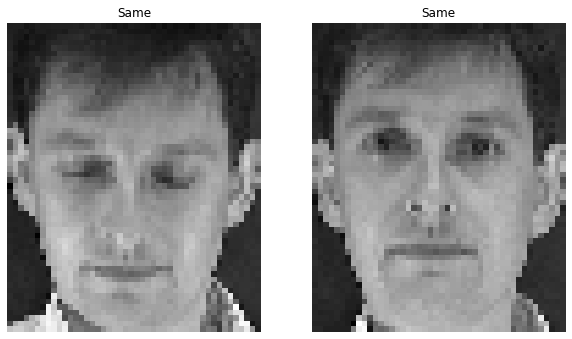

0.12382881
Difference Score =  0.12382881
Its a Same Image


In [67]:
n = np.random.randint(x_test[:,:].shape[0])
predict_score(x_test[n, 0], x_test[n, 1],n)

In [87]:
from PIL import Image as im
img1 = im.open(path + '/s2/10.pgm')
img2 = im.open(path + '/s39/9.pgm')

# img1 = im.open('/kaggle/input/' + 'test-siamese/A1.jpg')
# img2 = im.open('/kaggle/input/' + 'test-siamese/A2.jpg')
# img1 = img1.convert('L')
# img2 = img2.convert('L')

img1 = img1.resize((46,56))
img2 = img2.resize((46,56))
img1 = asarray(img1)/255
img2 = asarray(img2)/255
print(img1.shape,img2.shape)

(56, 46) (56, 46)


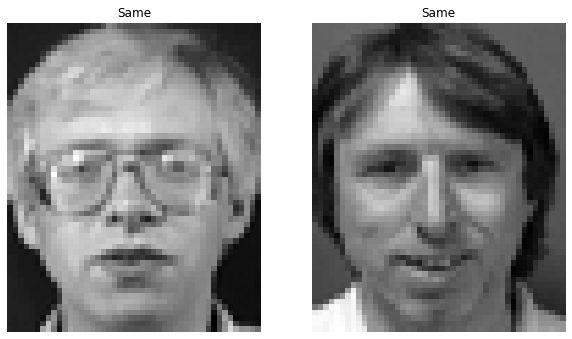

1.1251794
Difference Score =  1.1251794
Its a Different Image


In [88]:
predict_score(img1, img2,10,1)

In [89]:
from PIL import Image as im
img1 = im.open(path + '/s39/10.pgm')
img2 = im.open(path + '/s39/9.pgm')

# img1 = im.open('/kaggle/input/' + 'test-siamese/A1.jpg')
# img2 = im.open('/kaggle/input/' + 'test-siamese/A2.jpg')
# img1 = img1.convert('L')
# img2 = img2.convert('L')

img1 = img1.resize((46,56))
img2 = img2.resize((46,56))
img1 = asarray(img1)/255
img2 = asarray(img2)/255
print(img1.shape,img2.shape)

(56, 46) (56, 46)


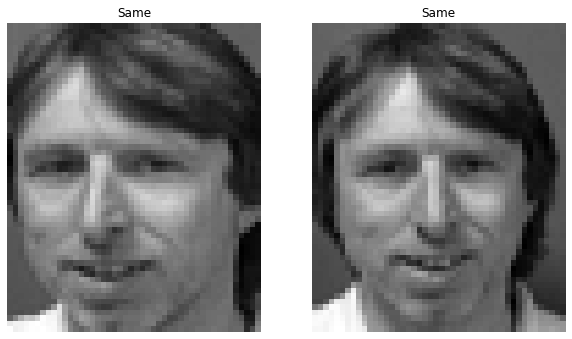

0.083035015
Difference Score =  0.083035015
Its a Same Image


In [90]:
predict_score(img1, img2,10,1)

## Prediction Outside Dataset
##### Here we can notice the distance between different images is 0.505 which is just above threshold.

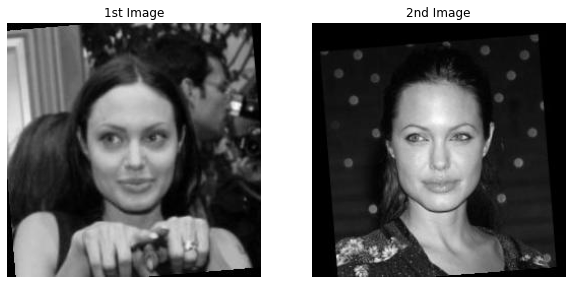

In [74]:
img1 = im.open('/content/drive/MyDrive/LFW_dataset/Angelina_Jolie/Angelina_Jolie_0002.jpg')
img2 = im.open('/content/drive/MyDrive/LFW_dataset/Angelina_Jolie/Angelina_Jolie_0006.jpg')
img1 = img1.convert('L')
img2 = img2.convert('L')
visualize_sample_images('/content/drive/MyDrive/LFW_dataset/Angelina_Jolie/Angelina_Jolie_0002.jpg','/content/drive/MyDrive/LFW_dataset/Angelina_Jolie/Angelina_Jolie_0006.jpg')

In [76]:
img1 = im.open('/content/drive/MyDrive/LFW_dataset/Angelina_Jolie/Angelina_Jolie_0002.jpg')
img2 = im.open('/content/drive/MyDrive/LFW_dataset/Angelina_Jolie/Angelina_Jolie_0009.jpg')
img1 = img1.convert('L')
img2 = img2.convert('L')
img1 = img1.resize((56,46))
img2 = img2.resize((56,46))
img1 = asarray(img1)/255
img2 = asarray(img2)/255
print(img1.shape,img2.shape)

(46, 56) (46, 56)


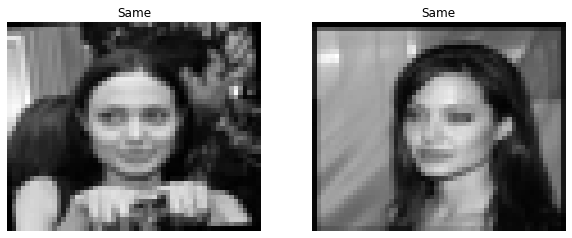

0.12898771
Difference Score =  0.12898771
Its a Same Image


In [77]:
predict_score(img1, img2,10,1)

In [85]:
img1 = im.open('/content/drive/MyDrive/LFW_dataset/Angelina_Jolie/Angelina_Jolie_0002.jpg')
img2 = im.open('/content/drive/MyDrive/LFW_dataset/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0001.jpg')
img1 = img1.convert('L')
img2 = img2.convert('L')
img1 = img1.resize((56,46))
img2 = img2.resize((56,46))
img1 = asarray(img1)/255
img2 = asarray(img2)/255
print(img1.shape,img2.shape)

(46, 56) (46, 56)


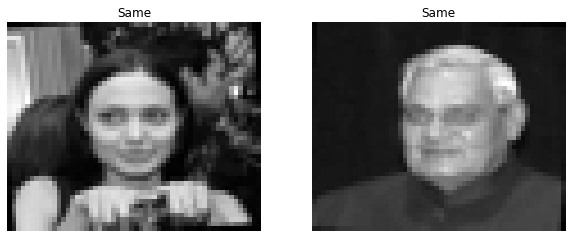

0.5060306
Difference Score =  0.5060306
Its a Different Image


In [86]:
predict_score(img1, img2,10,1)

## Future Work
Use **Coloured Images**, **Increase Picture Size**, and **check the scalability**
Currently We delibrately reduced image size while training to avoid resource exhaust error from Colab and also for fast computation.
